Written by Udi Aharoni  
A Rest-Wash-Spiteful evolution based on Chapter 2, Q1, from Mathematical Models of Social Evolution: A Guide for the Perplexed Richard McElreath and Robert Boyd

Populating the interactive namespace from numpy and matplotlib


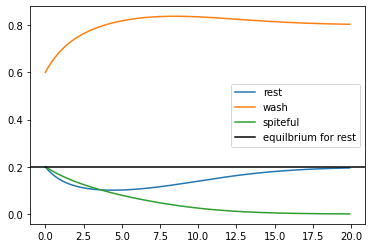

In [1]:
%pylab inline
from scipy.integrate import odeint

b=3
k=1
w0=0 # doesn't matter

def RestWashSpiteful(state,t):

  p = state[0] # Rest
  w = state[1] # Wash
  s = state[2] # Spiteful  
  
  frest=w0+p*0+w*b+s*0
  fwash=w0+p*(b-k)+(w+s)*(b-k/2)
  fspiteful=w0+p*0+(w+s)*(b-k/2)
  favg=p*frest+w*fwash+s*fspiteful
  
  dp=p*(frest-favg)  
  dw=w*(fwash-favg)  
  ds=s*(fspiteful-favg)    
  return [dp,dw,ds]

t = arange(0.0, 20.0, 0.1)

state0 = [0.2,0.6,0.2]

state = odeint(RestWashSpiteful,state0,t)



plot(t,state)

axhline(k/(2*b-k),color='k')
legend(['rest','wash','spiteful','equilbrium for rest'])

Now let's draw it on the simplex.

Copied code to draw and project data on simplex:

In [2]:
"""

Visualize points on the 3-simplex (eg, the parameters of a

3-dimensional multinomial distributions) as a scatter plot 

contained within a 2D triangle.



David Andrzejewski (david.andrzej@gmail.com)



From: https://gist.github.com/davidandrzej/939840

"""

import numpy as NP

import matplotlib.pyplot as P

import matplotlib.ticker as MT

import matplotlib.lines as L

import matplotlib.cm as CM

import matplotlib.colors as C

import matplotlib.patches as PA



def plotSimplex(points, fig=None, 

                vertexlabels=['1','2','3'],

                **kwargs):

    """

    Plot Nx3 points array on the 3-simplex 

    (with optionally labeled vertices) 

    

    kwargs will be passed along directly to matplotlib.pyplot.scatter    



    Returns Figure, caller must .show()

    """

    if(fig == None):        

        fig = P.figure()

    # Draw the triangle

    l1 = L.Line2D([0, 0.5, 1.0, 0], # xcoords

                  [0, NP.sqrt(3) / 2, 0, 0], # ycoords

                  color='k')

    fig.gca().add_line(l1)

    fig.gca().xaxis.set_major_locator(MT.NullLocator())

    fig.gca().yaxis.set_major_locator(MT.NullLocator())

    # Draw vertex labels

    fig.gca().text(-0.05, -0.05, vertexlabels[0])

    fig.gca().text(1.05, -0.05, vertexlabels[1])

    fig.gca().text(0.5, NP.sqrt(3) / 2 + 0.05, vertexlabels[2])

    # Project and draw the actual points

    projected = projectSimplex(points)

    P.scatter(projected[:,0], projected[:,1], **kwargs)              

    # Leave some buffer around the triangle for vertex labels

    fig.gca().set_xlim(-0.2, 1.2)

    fig.gca().set_ylim(-0.2, 1.2)



    return fig    



def projectSimplex(points):

    """ 

    Project probabilities on the 3-simplex to a 2D triangle

    

    N points are given as N x 3 array

    """

    # Convert points one at a time

    tripts = NP.zeros((points.shape[0],2))

    for idx in range(points.shape[0]):

        # Init to triangle centroid

        x = 1.0 / 2

        y = 1.0 / (2 * NP.sqrt(3))

        # Vector 1 - bisect out of lower left vertex 

        p1 = points[idx, 0]

        x = x - (1.0 / NP.sqrt(3)) * p1 * NP.cos(NP.pi / 6)

        y = y - (1.0 / NP.sqrt(3)) * p1 * NP.sin(NP.pi / 6)

        # Vector 2 - bisect out of lower right vertex  

        p2 = points[idx, 1]  

        x = x + (1.0 / NP.sqrt(3)) * p2 * NP.cos(NP.pi / 6)

        y = y - (1.0 / NP.sqrt(3)) * p2 * NP.sin(NP.pi / 6)        

        # Vector 3 - bisect out of top vertex

        p3 = points[idx, 2]

        y = y + (1.0 / NP.sqrt(3) * p3)

      

        tripts[idx,:] = (x,y)



    return tripts






New function for drawing arrows on simplex:

In [3]:
def arrowsOnSimplex(func,steps):

  # prepare grid [r,w,s] on which we'll sample:
  sampleGrid=numpy.empty([0,3]);
  for r in range(steps+1):  
  #for r in [0]:
    for w in range(0,steps+1-r):            
      sampleGrid=numpy.vstack([sampleGrid,[r,w,steps-r-w]])
  sampleGrid=sampleGrid/steps

  # 
  vals=numpy.empty([0,3]);
  for i in range(sampleGrid.shape[0]):
    vals=numpy.vstack([vals,func(sampleGrid[i,:],0)]);

  arrowStart=projectSimplex(sampleGrid);
  arrowEnd=projectSimplex(sampleGrid+vals);
  
  DX1=arrowEnd[:,0]-arrowStart[:,0];
  DY1=arrowEnd[:,1]-arrowStart[:,1];
  #print(DY1)

  M = (hypot(DX1, DY1))
  
  M[ M ==0] = 1.                                 # Avoid zero division errors 
  DX1=DX1 / M                                        # Normalize each arrows
  DY1=DY1 / M  
  
  realLens=numpy.linalg.norm(vals,axis=1);

  # clear near vanishing arrows
  DX1[realLens<1e-5]=0;
  DY1[realLens<1e-5]=0;

  quiver(arrowStart[:,0],arrowStart[:,1],DX1,DY1,realLens, pivot='mid', cmap=cm.jet)

Now put it together:

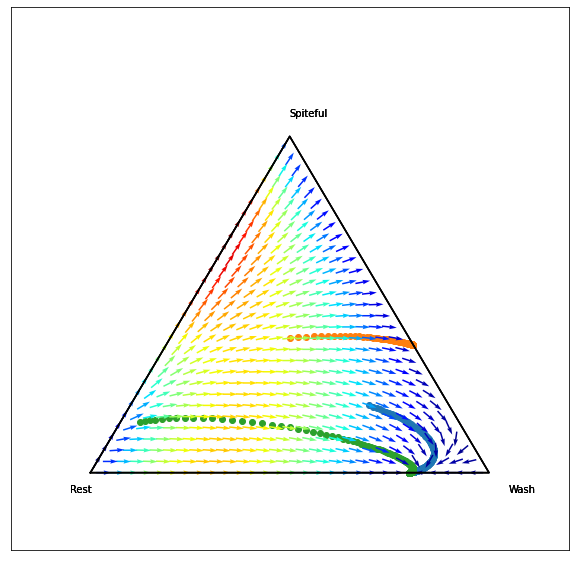

In [4]:
cmap = CM.get_cmap('Spectral')


t = arange(0.0, 40.0, 0.1)


# Plot three particular trajectories:
# The one we saw above:
state0 = [0.2,0.6,0.2]   
state = odeint(RestWashSpiteful, state0, t)
fig = P.figure(figsize=[10,10])
plotSimplex(state,fig=fig,cmap=cmap, norm=norm, vertexlabels=['Rest','Wash','Spiteful'])

# Two more:
state0 = [0.3,0.3,0.4]   
state = odeint(RestWashSpiteful, state0, t)
plotSimplex(state,fig=fig,cmap=cmap, norm=norm, vertexlabels=['Rest','Wash','Spiteful'])

state0 = [0.8,0.05,0.15]   
state = odeint(RestWashSpiteful, state0, t)
plotSimplex(state,fig=fig,cmap=cmap, norm=norm, vertexlabels=['Rest','Wash','Spiteful'])

# Add arrows:
arrowsOnSimplex(RestWashSpiteful,30);

P.show()



Similar to the Hawk-Dove-Retaliator case, we see the Rest-Wash equilibrium.

Also we the Wash-Spiteful edge line is similar to the Dove-Retaliator edge line. If there are fewer than some threshold Washes (Doves) then Rest (Hawk) can invade.